In [ ]:
!pip install yfinance

In [ ]:
!pip install git+https://github.com/quantopian/pyfolio

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pyfolio as pf

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [ ]:
'''
let's get ETF data
SPY = S&P 500 ETF
QQQ = Nasdaq ETF
GLD = SPDR Gold ETF
IEF = 7-10y bond ETF 
TMF = 20+ y bond 3x ETF
''' 
data = yf.download(tickers = "SPY QQQ GLD IEF TMF",period ='10y' )

[*********************100%***********************]  5 of 5 completed


In [ ]:
df = data.Close.fillna(method='ffill')

In [ ]:
spy = df.SPY.copy()

In [ ]:
spy_ret = spy.pct_change().iloc[1:]

In [ ]:
spy_ret.head()

Date
2011-09-01   -0.010473
2011-09-02   -0.025550
2011-09-06   -0.007297
2011-09-07    0.028208
2011-09-08   -0.010392
Name: SPY, dtype: float64

In [ ]:
spy_ret.tail(5)

Date
2021-08-25    0.002098
2021-08-26   -0.005903
2021-08-27    0.008941
2021-08-30    0.004398
2021-08-31   -0.001703
Name: SPY, dtype: float64

In [ ]:
pf.

In [ ]:
pf.create_returns_tear_sheet(spy_ret, live_start_date='2018-12-31')

TypeError: ignored

In [ ]:
print(spy_ret.index.tzinfo)

None


In [ ]:
spy_ret.tz_localize('UTC')

Date
2011-09-01 00:00:00+00:00   -0.010473
2011-09-02 00:00:00+00:00   -0.025550
2011-09-06 00:00:00+00:00   -0.007297
2011-09-07 00:00:00+00:00    0.028208
2011-09-08 00:00:00+00:00   -0.010392
                               ...   
2021-08-25 00:00:00+00:00    0.002098
2021-08-26 00:00:00+00:00   -0.005903
2021-08-27 00:00:00+00:00    0.008941
2021-08-30 00:00:00+00:00    0.004398
2021-08-31 00:00:00+00:00   -0.001703
Name: SPY, Length: 2516, dtype: float64

In [ ]:
spy_ret.index = pd.to_datetime(spy_ret.index).tz_localize('UTC')

In [ ]:
spy_ret.index

DatetimeIndex(['2011-09-01 00:00:00+00:00', '2011-09-02 00:00:00+00:00',
               '2011-09-06 00:00:00+00:00', '2011-09-07 00:00:00+00:00',
               '2011-09-08 00:00:00+00:00', '2011-09-09 00:00:00+00:00',
               '2011-09-12 00:00:00+00:00', '2011-09-13 00:00:00+00:00',
               '2011-09-14 00:00:00+00:00', '2011-09-15 00:00:00+00:00',
               ...
               '2021-08-18 00:00:00+00:00', '2021-08-19 00:00:00+00:00',
               '2021-08-20 00:00:00+00:00', '2021-08-23 00:00:00+00:00',
               '2021-08-24 00:00:00+00:00', '2021-08-25 00:00:00+00:00',
               '2021-08-26 00:00:00+00:00', '2021-08-27 00:00:00+00:00',
               '2021-08-30 00:00:00+00:00', '2021-08-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=2516, freq=None)

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.10,2020-02-19,2020-03-23,2020-08-18,130
1,20.18,2018-09-20,2018-12-24,2019-04-29,158
2,14.35,2015-05-21,2016-02-11,2016-07-12,299
3,10.16,2018-01-26,2018-04-02,2018-08-24,151
4,9.80,2020-09-02,2020-09-23,2020-11-13,53


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


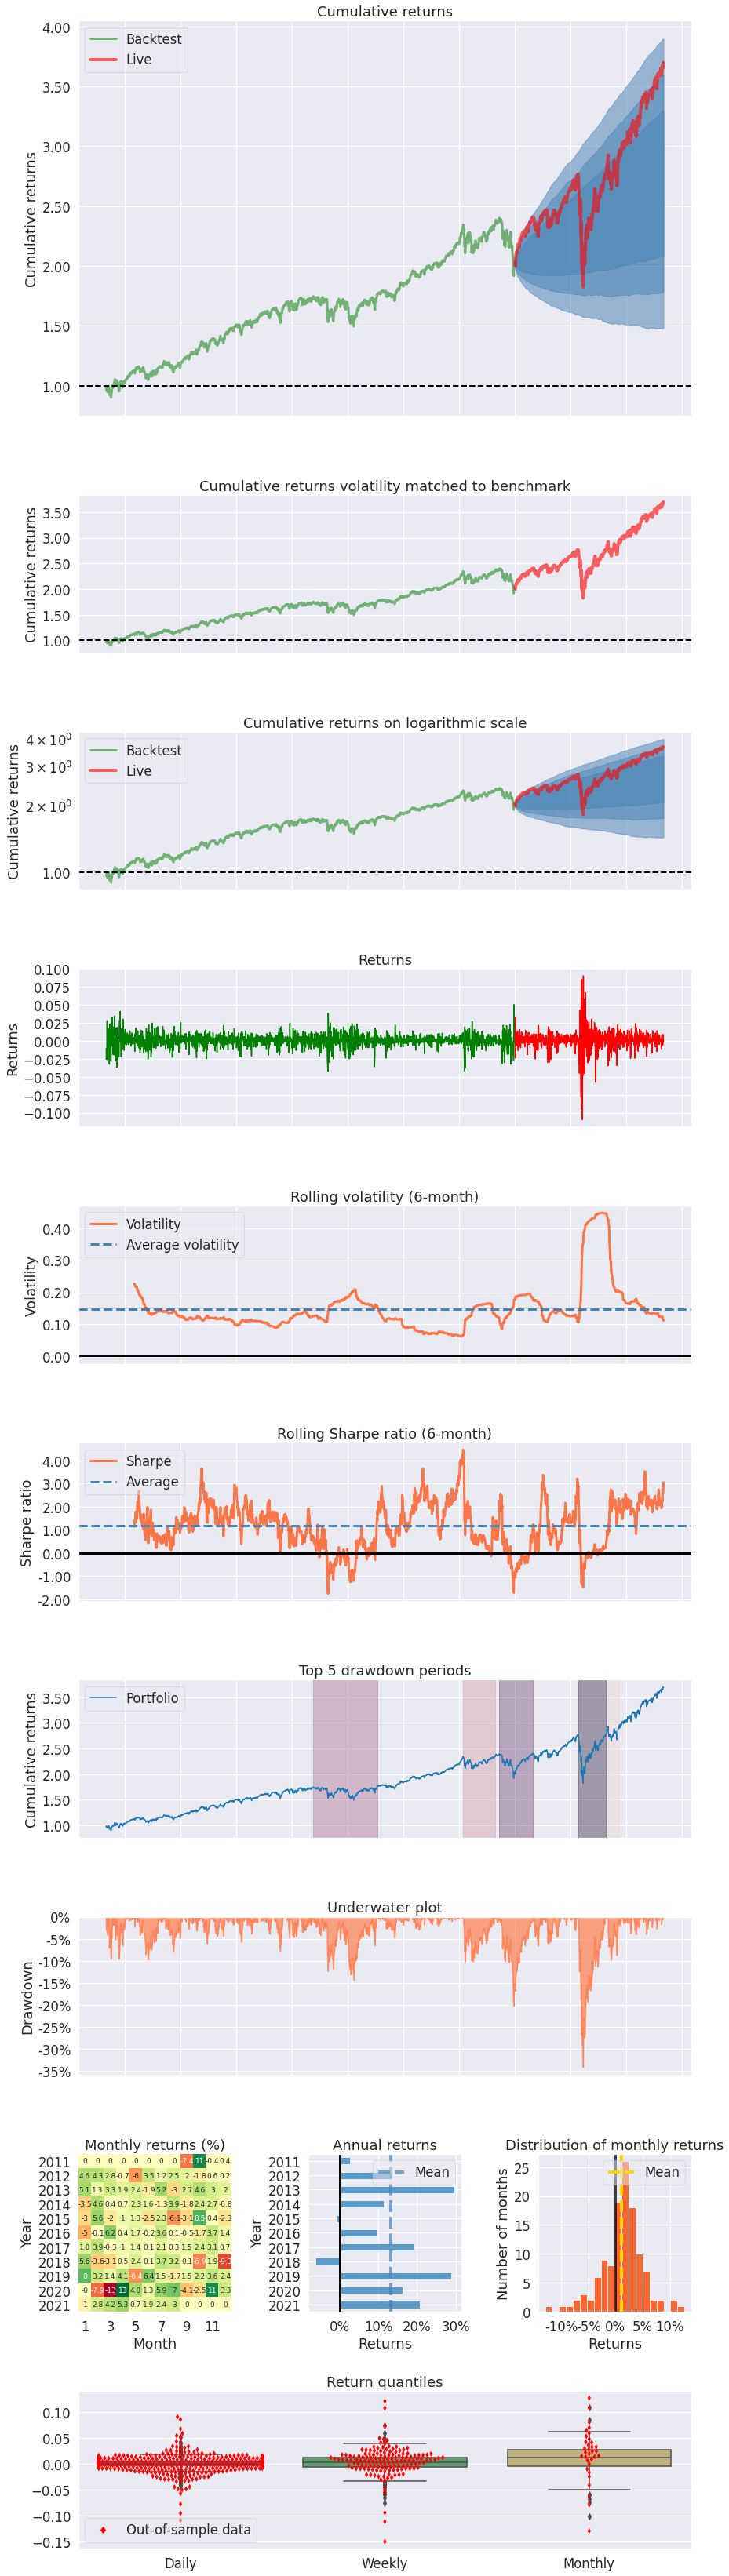

In [ ]:
pf.create_returns_tear_sheet(spy_ret, live_start_date='2018-12-31')

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.10,2020-02-19,2020-03-23,2020-08-18,130
1,20.18,2018-09-20,2018-12-24,2019-04-29,158
2,14.35,2015-05-21,2016-02-11,2016-07-12,299
3,10.16,2018-01-26,2018-04-02,2018-08-24,151
4,9.80,2020-09-02,2020-09-23,2020-11-13,53


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Stress Events,mean,min,max
EZB IR Event,-0.03%,-1.06%,1.52%
Apr14,0.04%,-2.10%,1.08%


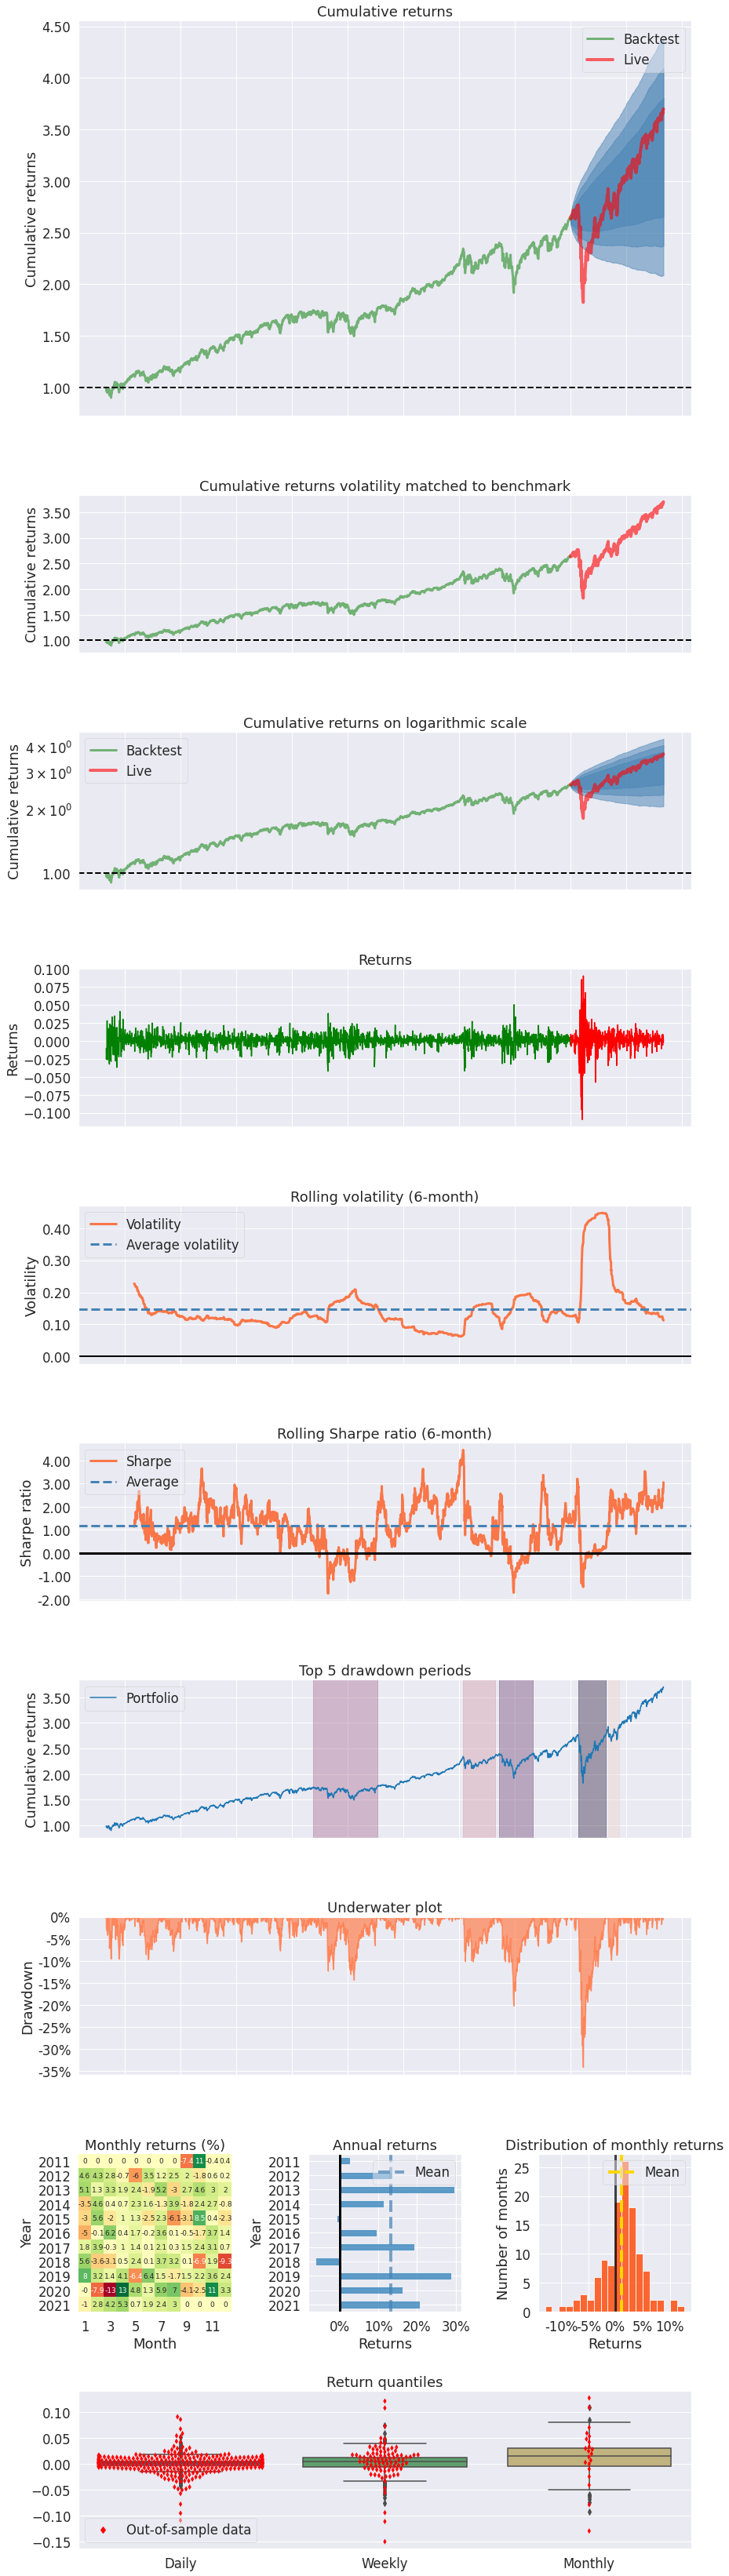

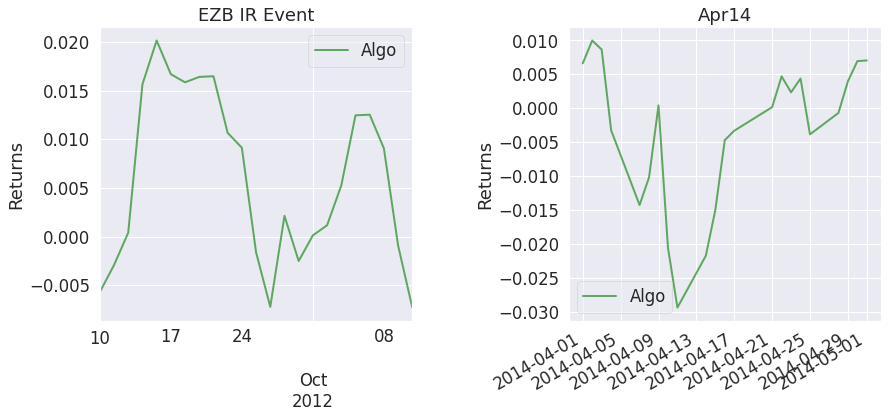

In [ ]:
pf.create_full_tear_sheet(spy_ret,live_start_date='2019-12-31')

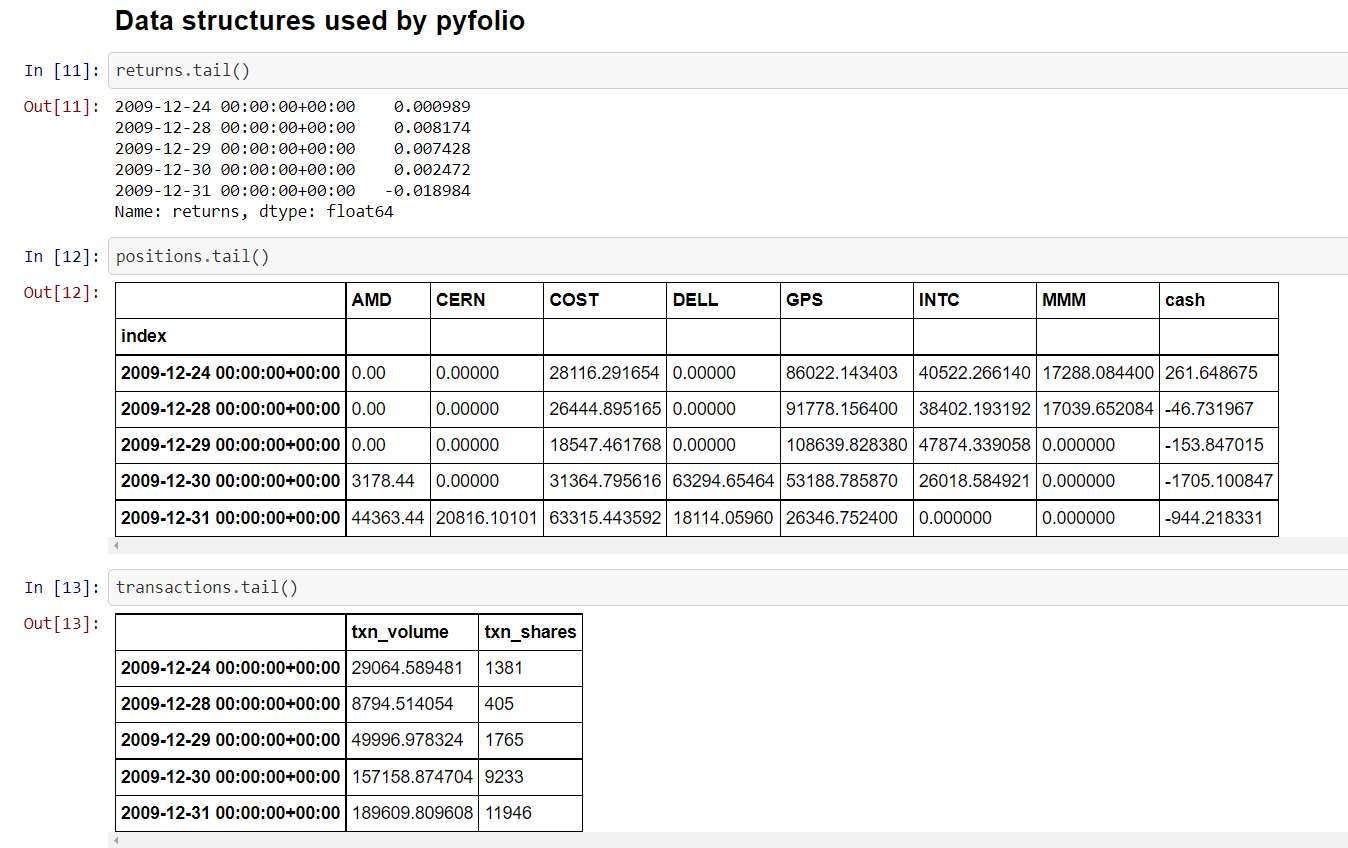

In [ ]:
port = df.loc[:,['QQQ','SPY']].copy()

In [ ]:
port_ret = port.pct_change()

In [ ]:
initial_amount = 100000
#assume no fees 

In [ ]:
port_ret

,QQQ,SPY
Date,,
2011-08-31,NaN,NaN
2011-09-01,-0.009081,-0.010473
2011-09-02,-0.023460,-0.025550
2011-09-06,0.000188,-0.007297
2011-09-07,0.025333,0.028208
...,...,...
2021-08-25,0.001149,0.002098
2021-08-26,-0.006350,-0.005903
2021-08-27,0.009720,0.008941


In [ ]:
(port_ret+1).cumprod()

,QQQ,SPY
Date,,
2011-08-31,NaN,NaN
2011-09-01,0.990919,0.989527
2011-09-02,0.967672,0.964245
2011-09-06,0.967853,0.957208
2011-09-07,0.992372,0.984209
...,...,...
2021-08-25,6.807119,3.672967
2021-08-26,6.763894,3.651285
2021-08-27,6.829640,3.683931


In [ ]:
port_value = (port_ret+1).cumprod()*initial_amount/len(port_ret.columns)

In [ ]:
port_value

,QQQ,SPY
Date,,
2011-08-31,NaN,NaN
2011-09-01,49545.949884,49476.354620
2011-09-02,48383.579232,48212.239117
2011-09-06,48392.662174,47860.414292
2011-09-07,49618.596101,49210.440073
...,...,...
2021-08-25,340355.955725,183648.338725
2021-08-26,338194.700453,182564.230612
2021-08-27,341482.018857,184196.529006


In [ ]:
port_value['total'] = port_value['QQQ'] + port_value['SPY'] 
port_value

,QQQ,SPY,total
Date,,,
2011-08-31,NaN,NaN,NaN
2011-09-01,49545.949884,49476.354620,99022.304504
2011-09-02,48383.579232,48212.239117,96595.818349
2011-09-06,48392.662174,47860.414292,96253.076466
2011-09-07,49618.596101,49210.440073,98829.036174
...,...,...,...
2021-08-25,340355.955725,183648.338725,524004.294450
2021-08-26,338194.700453,182564.230612,520758.931065
2021-08-27,341482.018857,184196.529006,525678.547864


In [ ]:
port_value.iloc[0] = [0,0,initial_amount]

In [ ]:
port_value['port_return'] = port_value.total.pct_change()

In [ ]:
port_value

,QQQ,SPY,total,port_return
Date,,,,
2011-08-31,50000.000000,50000.000000,100000.000000,NaN
2011-09-01,49545.949884,49476.354620,99022.304504,-0.009777
2011-09-02,48383.579232,48212.239117,96595.818349,-0.024504
2011-09-06,48392.662174,47860.414292,96253.076466,-0.003548
2011-09-07,49618.596101,49210.440073,98829.036174,0.026762
...,...,...,...,...
2021-08-25,340355.955725,183648.338725,524004.294450,0.001481
2021-08-26,338194.700453,182564.230612,520758.931065,-0.006193
2021-08-27,341482.018857,184196.529006,525678.547864,0.009447


In [ ]:
port_value.index = pd.to_datetime(port_value.index).tz_localize('UTC')

In [ ]:
returns = port_value['port_return']

In [ ]:
returns.head()

Date
2011-08-31 00:00:00+00:00         NaN
2011-09-01 00:00:00+00:00   -0.009777
2011-09-02 00:00:00+00:00   -0.024504
2011-09-06 00:00:00+00:00   -0.003548
2011-09-07 00:00:00+00:00    0.026762
Name: port_return, dtype: float64

In [ ]:
positions = port_value.iloc[:,:2]

In [ ]:
positions.tail()

,QQQ,SPY
Date,,
2021-08-25 00:00:00+00:00,340355.955725,183648.338725
2021-08-26 00:00:00+00:00,338194.700453,182564.230612
2021-08-27 00:00:00+00:00,341482.018857,184196.529006
2021-08-30 00:00:00+00:00,345314.202943,185006.548220
2021-08-31 00:00:00+00:00,344206.319552,184691.534506


In [ ]:
positions['cash'] = 0

In [ ]:
positions.iloc[0] = [0,0,100000]

In [ ]:
positions.head()

,QQQ,SPY,cash
Date,,,
2011-08-31 00:00:00+00:00,0.000000,0.000000,100000
2011-09-01 00:00:00+00:00,49545.949884,49476.354620,0
2011-09-02 00:00:00+00:00,48383.579232,48212.239117,0
2011-09-06 00:00:00+00:00,48392.662174,47860.414292,0
2011-09-07 00:00:00+00:00,49618.596101,49210.440073,0


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,30.43,2020-02-19,2020-03-23,2020-06-10,81
1,21.69,2018-08-29,2018-12-24,2019-04-22,169
2,14.82,2015-12-01,2016-02-11,2016-07-20,167
3,13.01,2015-07-20,2015-08-25,2015-11-03,77
4,11.73,2020-09-02,2020-09-23,2020-12-01,65


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Stress Events,mean,min,max
EZB IR Event,-0.10%,-1.30%,1.44%
Apr14,0.02%,-2.61%,1.40%


Top 10 long positions of all time,max
QQQ,65.59%
SPY,50.83%


Top 10 short positions of all time,max


Top 10 positions of all time,max
QQQ,65.59%
SPY,50.83%


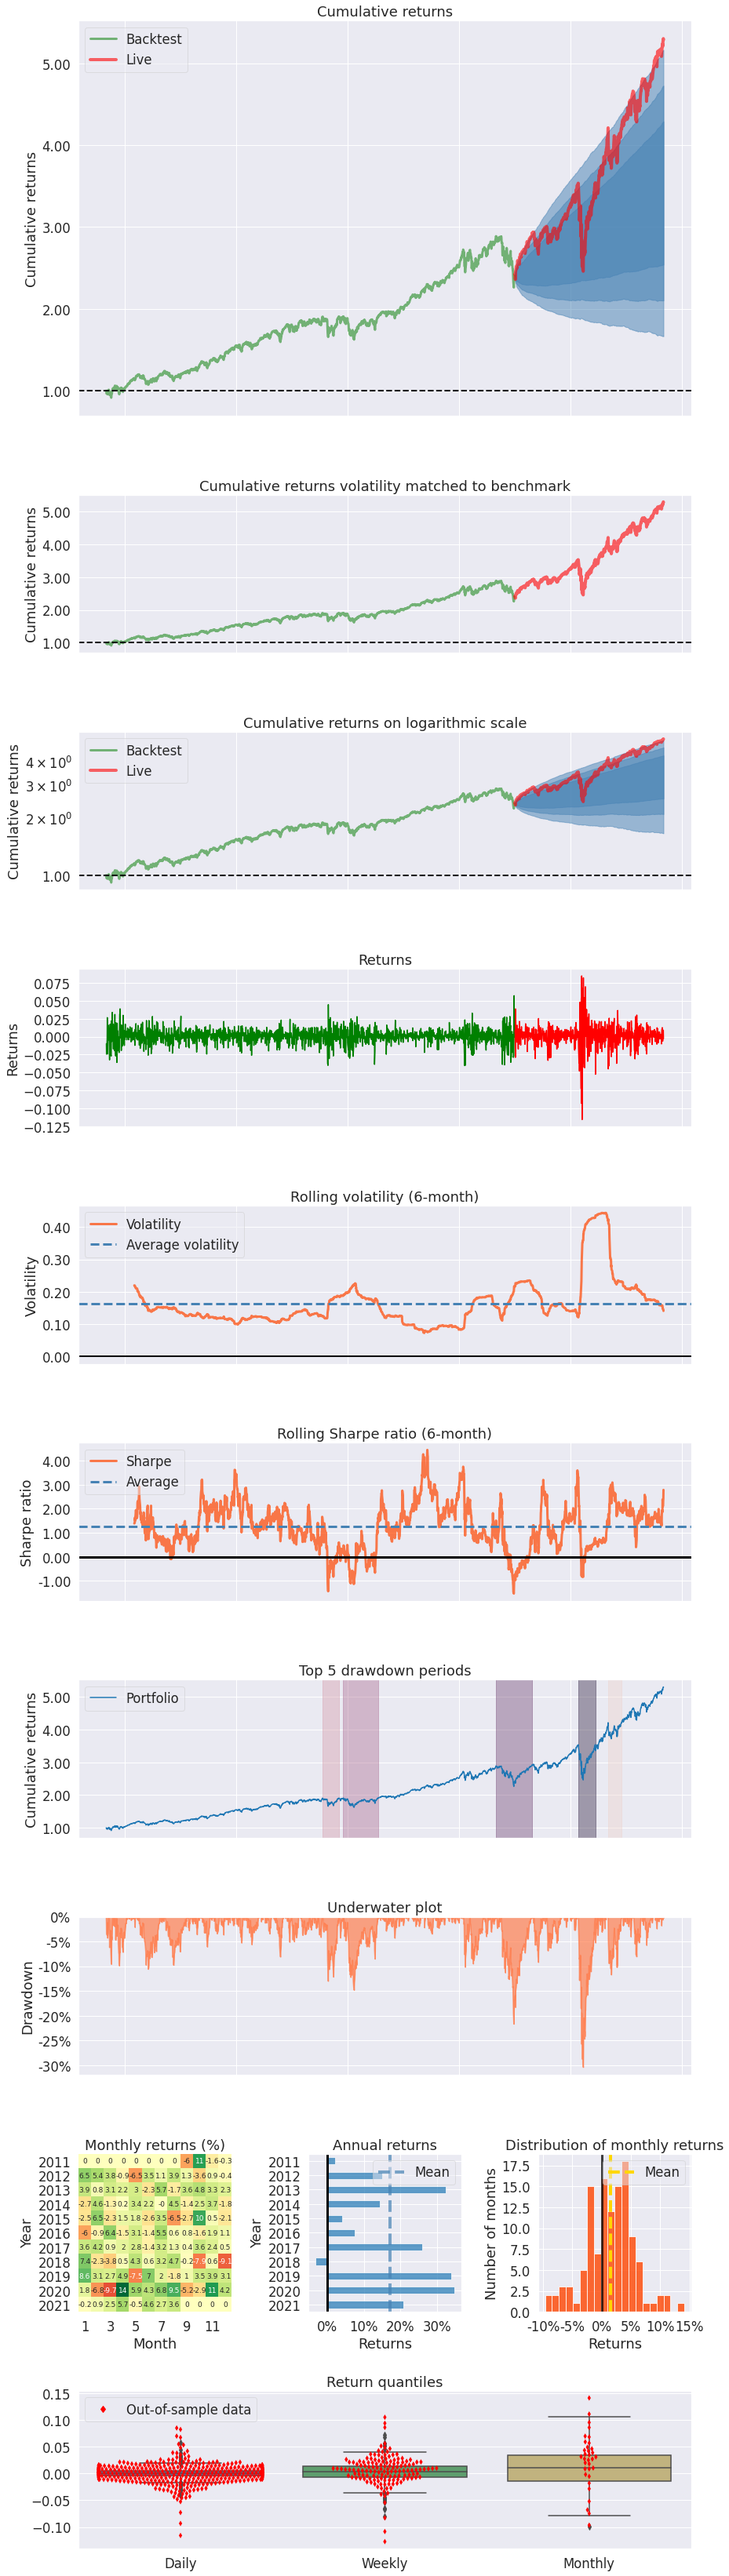

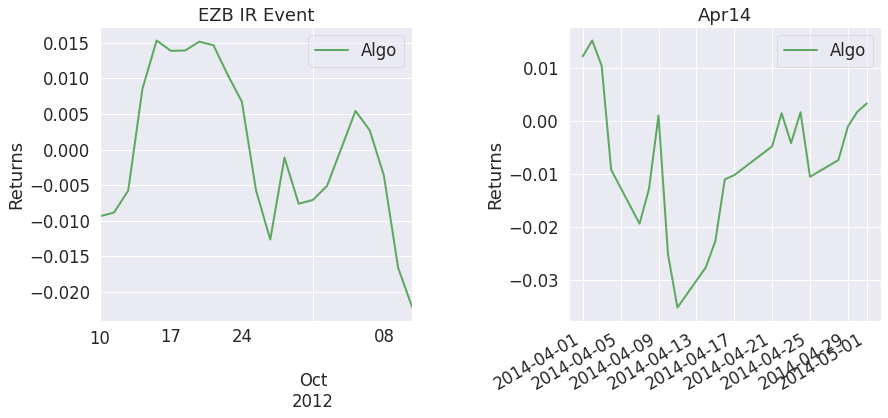

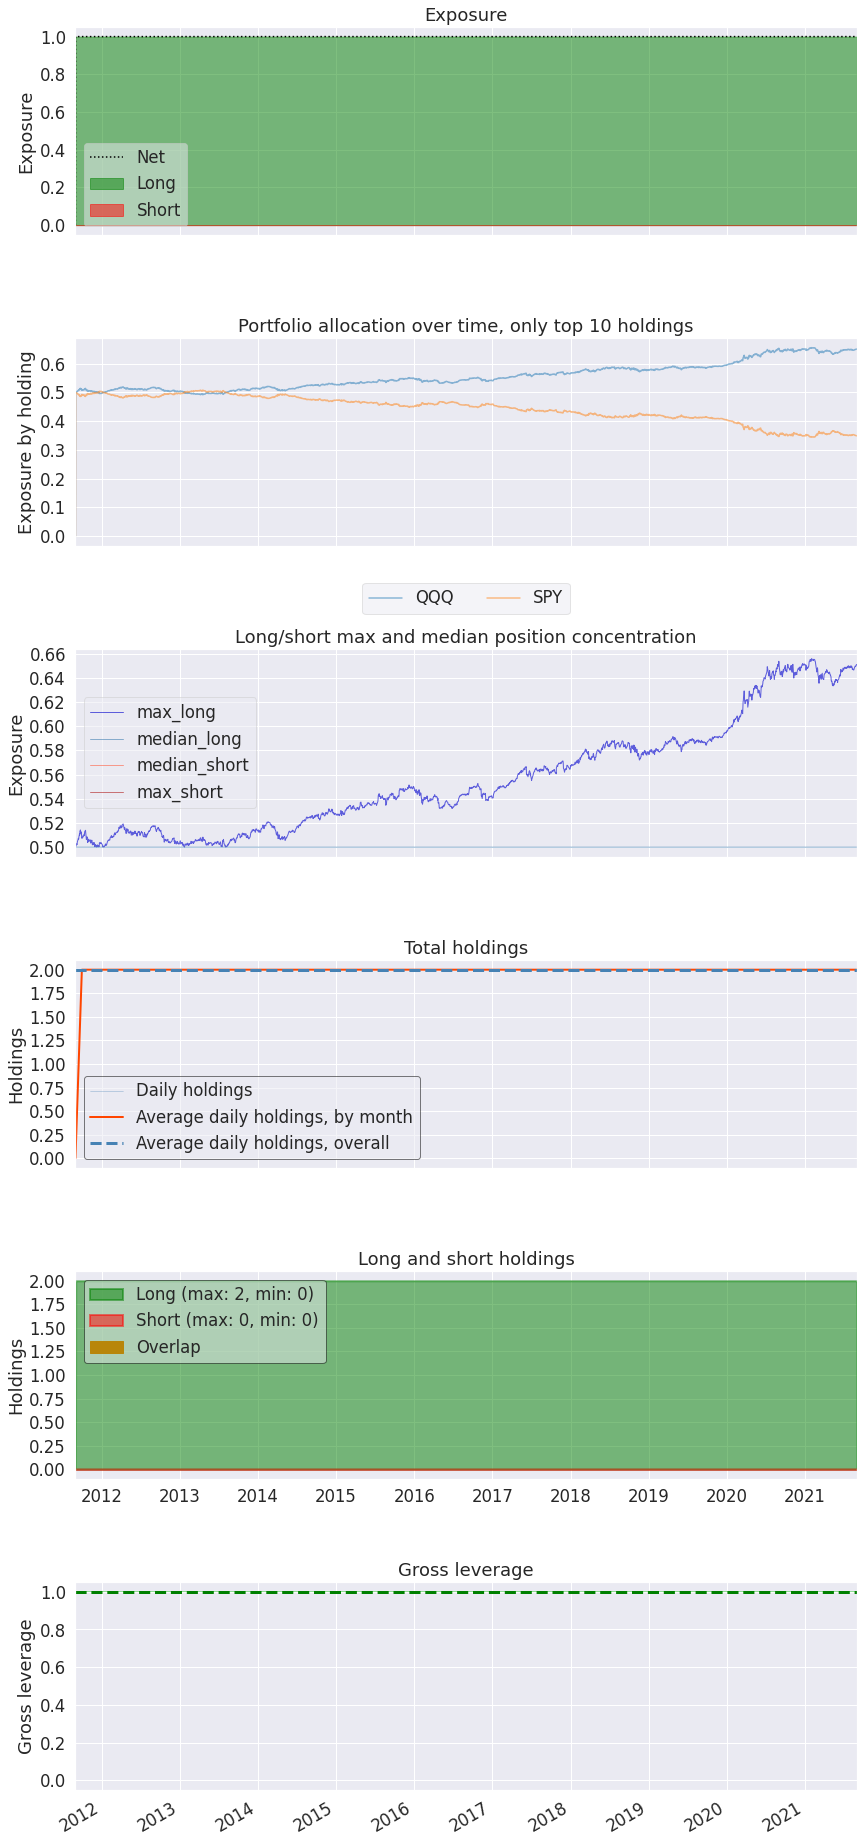

In [ ]:
pf.create_full_tear_sheet(returns, 
                             live_start_date='2018-12-31',
                             positions=positions)

In [ ]:
help(pf.plotting)

In [ ]:
help(pf.timeseries)

Help on module pyfolio.timeseries in pyfolio:

NAME
    pyfolio.timeseries

DESCRIPTION
    # Copyright 2018 Quantopian, Inc.
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.

FUNCTIONS
    aggregate_returns(returns, convert_to)
        Aggregates returns by week, month, or year.
        
        Parameters
        ----------
        returns : pd.Series
           Daily returns of the strategy, noncumulative.
            - See full explanation in :fun

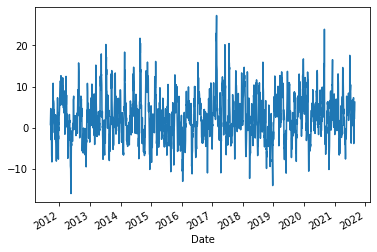

In [ ]:
pf.timeseries.rolling_sharpe(returns,10).plot()

In [ ]:
# Show overview of pyfolio.plotting submodule
[f for f in dir(pf.plotting) if 'plot_' in f]

['plot_annual_returns',
 'plot_capacity_sweep',
 'plot_cones',
 'plot_daily_turnover_hist',
 'plot_daily_volume',
 'plot_drawdown_periods',
 'plot_drawdown_underwater',
 'plot_exposures',
 'plot_gross_leverage',
 'plot_holdings',
 'plot_long_short_holdings',
 'plot_max_median_position_concentration',
 'plot_monthly_returns_dist',
 'plot_monthly_returns_heatmap',
 'plot_monthly_returns_timeseries',
 'plot_perf_stats',
 'plot_prob_profit_trade',
 'plot_return_quantiles',
 'plot_returns',
 'plot_rolling_beta',
 'plot_rolling_returns',
 'plot_rolling_sharpe',
 'plot_rolling_volatility',
 'plot_round_trip_lifetimes',
 'plot_sector_allocations',
 'plot_slippage_sensitivity',
 'plot_slippage_sweep',
 'plot_turnover',
 'plot_txn_time_hist',
 'show_and_plot_top_positions']

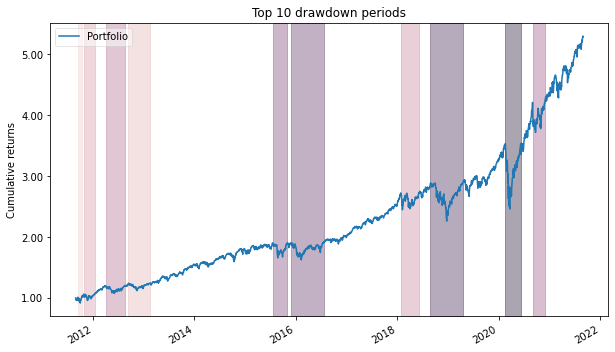

In [ ]:
pf.plot_drawdown_periods(returns,figsize=(10,6))

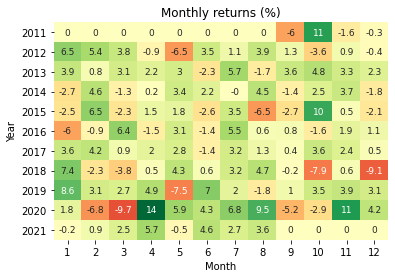

In [ ]:
pf.plot_monthly_returns_heatmap(returns)